In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
chdData = pd.read_csv('/content/sample_data/HeartDisease-Train.csv')

In [ ]:
chdData.shape


(3200, 16)

The number of variables in the dataframe chdData are 16 and number of observations are 3200.

In [ ]:
#Q2
chdDataSelected = chdData[['male','age','sysBP','cigsPerDay','heartRate','glucose','BMI','totChol','TenYearCHD']]
print(chdDataSelected)

      male  age  sysBP  cigsPerDay  heartRate  glucose    BMI  totChol  \
0        0   41  129.0         9.0        110     65.0  39.69    280.0   
1        1   43   97.0        15.0         75     68.0  23.05    224.0   
2        0   46  131.5         0.0         68    112.0  21.02    304.0   
3        1   45  133.0         0.0         88    115.0  31.90    218.0   
4        1   42  112.0        20.0         80     69.0  25.31    230.0   
...    ...  ...    ...         ...        ...      ...    ...      ...   
3195     0   60  132.0         0.0         80     98.0  25.38    334.0   
3196     1   48  131.0         0.0         75     77.0  24.95    175.0   
3197     0   53  114.0         0.0         70     79.0  26.21    291.0   
3198     0   39  103.0         0.0         70     69.0  20.68    181.0   
3199     0   65  190.0         3.0         80      NaN  39.54    211.0   

      TenYearCHD  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
#Q3
chdDataSelected.dtypes

male            int64
age             int64
sysBP         float64
cigsPerDay    float64
heartRate       int64
glucose       float64
BMI           float64
totChol       float64
TenYearCHD      int64
dtype: object

In [ ]:
chdDataSelected['male'] = chdDataSelected['male'].astype('category')
chdDataSelected['TenYearCHD'] = chdDataSelected['TenYearCHD'].astype('category')

<ipython-input-7-5e1058e23673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chdDataSelected['male'] = chdDataSelected['male'].astype('category')
<ipython-input-7-5e1058e23673>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chdDataSelected['TenYearCHD'] = chdDataSelected['TenYearCHD'].astype('category')


In [ ]:
chdDataSelected.dtypes

male          category
age              int64
sysBP          float64
cigsPerDay     float64
heartRate        int64
glucose        float64
BMI            float64
totChol        float64
TenYearCHD    category
dtype: object

In [ ]:
#Q4
chdDataSelected.isnull().sum()

male            0
age             0
sysBP           0
cigsPerDay     23
heartRate       0
glucose       309
BMI            14
totChol        38
TenYearCHD      0
dtype: int64

In [ ]:
#5
mean_glucose= chdDataSelected['glucose'].mean()
chdDataSelected['glucose'].fillna(mean_glucose, inplace=True)
chdDataSelected.isna().sum()

<ipython-input-10-e457df7b7713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chdDataSelected['glucose'].fillna(mean_glucose, inplace=True)


male           0
age            0
sysBP          0
cigsPerDay    23
heartRate      0
glucose        0
BMI           14
totChol       38
TenYearCHD     0
dtype: int64

In [ ]:
chdDataSelected.isnull().sum()

male           0
age            0
sysBP          0
cigsPerDay    23
heartRate      0
glucose        0
BMI           14
totChol       38
TenYearCHD     0
dtype: int64

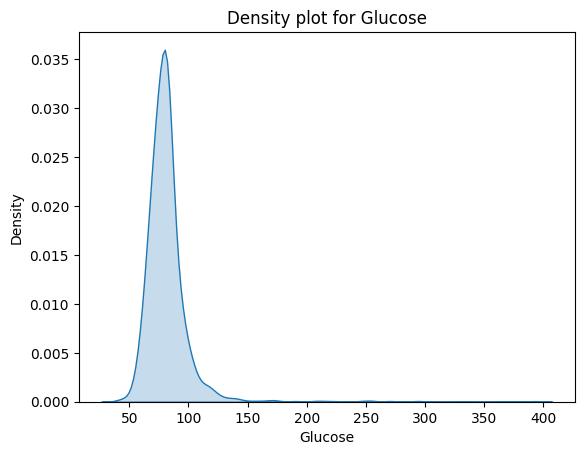

In [ ]:
#6
sns.kdeplot(chdDataSelected['glucose'], fill=True)
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.title('Density plot for Glucose')
plt.show()

In [ ]:
#Q7
chdDataSelected = chdDataSelected.dropna()
chdDataSelected.describe()

,age,sysBP,cigsPerDay,heartRate,glucose,BMI,totChol
count,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000
mean,49.679463,132.502239,8.803903,75.879718,81.959093,25.798519,237.374280
std,8.555042,21.698188,11.891951,11.989899,22.618084,4.030157,44.189346
min,32.000000,85.000000,0.000000,45.000000,40.000000,15.540000,119.000000
25%,42.000000,117.000000,0.000000,68.000000,72.000000,23.060000,206.000000
50%,49.000000,128.500000,0.000000,75.000000,79.500000,25.410000,235.000000
75%,57.000000,144.000000,20.000000,83.000000,85.000000,28.027500,263.000000
max,70.000000,244.000000,70.000000,143.000000,394.000000,51.280000,464.000000


Text(0.5, 1.0, 'Male Grouped by TenYearCHD')

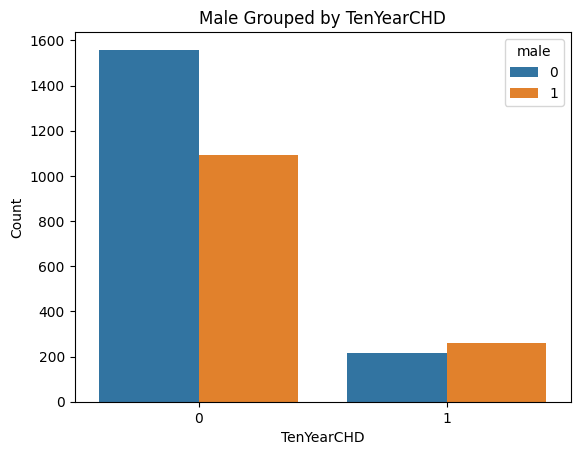

In [ ]:
#8
sns.countplot(x='TenYearCHD', hue= 'male',data=chdDataSelected)
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Male Grouped by TenYearCHD')


In [ ]:
#9
chdDataSelected['TenYearCHD_Encoded'] = chdDataSelected['TenYearCHD'].map({0: 'No', 1: 'Yes'})

In [ ]:
chdDataSelected['TenYearCHD_Encoded'] = chdDataSelected['TenYearCHD_Encoded'].astype('category')

In [ ]:
print(chdDataSelected)

     male  age  sysBP  cigsPerDay  heartRate    glucose    BMI  totChol  \
0       0   41  129.0         9.0        110   65.00000  39.69    280.0   
1       1   43   97.0        15.0         75   68.00000  23.05    224.0   
2       0   46  131.5         0.0         68  112.00000  21.02    304.0   
3       1   45  133.0         0.0         88  115.00000  31.90    218.0   
4       1   42  112.0        20.0         80   69.00000  25.31    230.0   
...   ...  ...    ...         ...        ...        ...    ...      ...   
3195    0   60  132.0         0.0         80   98.00000  25.38    334.0   
3196    1   48  131.0         0.0         75   77.00000  24.95    175.0   
3197    0   53  114.0         0.0         70   79.00000  26.21    291.0   
3198    0   39  103.0         0.0         70   69.00000  20.68    181.0   
3199    0   65  190.0         3.0         80   82.04808  39.54    211.0   

     TenYearCHD TenYearCHD_Encoded  
0             0                 No  
1             0          

In [ ]:
#10
chdDataSelected_no = chdDataSelected [ chdDataSelected ['TenYearCHD_Encoded'] == 'No']
chdDataSelected_yes= chdDataSelected [ chdDataSelected ['TenYearCHD_Encoded'] =='Yes']
sampled_no = chdDataSelected_no . sample ( len ( chdDataSelected_yes ) )
chdDataSelected = pd . concat([sampled_no , chdDataSelected_yes])
chdDataSelected = chdDataSelected . sample ( frac=1). reset_index( drop=True )

In [ ]:
#11
X = chdDataSelected[['male','age','sysBP','cigsPerDay','heartRate','glucose','BMI','totChol']]
Y = chdDataSelected['TenYearCHD_Encoded']

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state= 42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

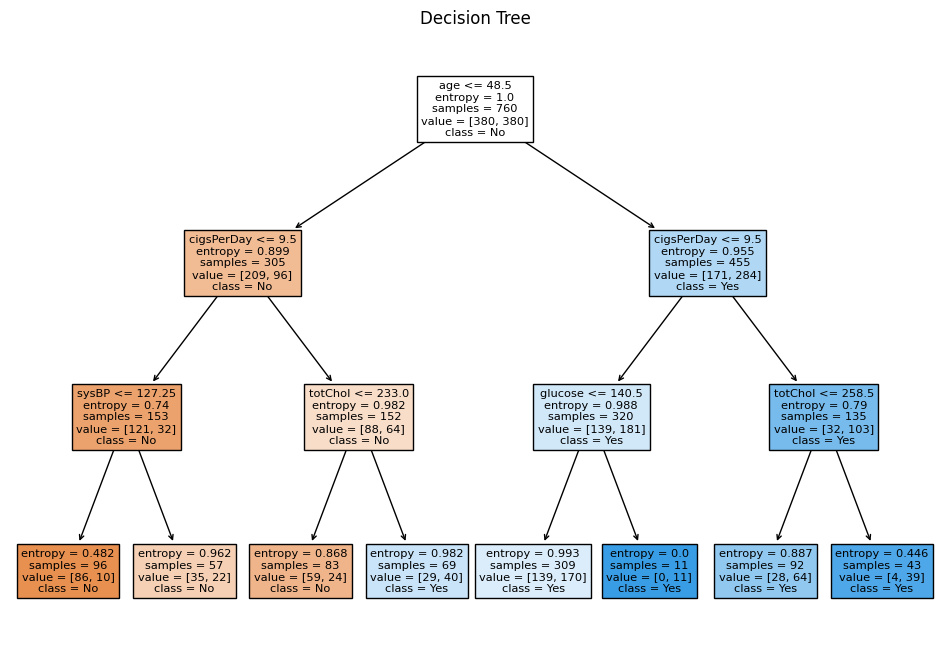

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=list(X.columns),class_names=list(model.classes_), )
plt.title("Decision Tree")
plt.show()



In [ ]:
#12
testData = pd.read_csv('/content/sample_data/HeartDisease-Test.csv')

In [ ]:
testData.shape

(1040, 16)

In [ ]:
testData.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
testData['male'] = testData['male'].astype('category')
testData['education'] = testData['education'].astype('category')
testData['currentSmoker'] = testData['currentSmoker'].astype('category')
testData['BPMeds'] = testData['BPMeds'].astype('category')

testData['prevalentStroke'] = testData['prevalentStroke'].astype('category')
testData['diabetes'] = testData['diabetes'].astype('category')
testData['TenYearCHD'] = testData['TenYearCHD'].astype('category')
testData['prevalentHyp'] = testData['prevalentHyp'].astype('category')

In [ ]:
testData.dtypes

male               category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [ ]:
testData.isna().sum()

male                0
age                 0
education          29
currentSmoker       0
cigsPerDay          6
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 5
heartRate           1
glucose            79
TenYearCHD          0
dtype: int64

In [ ]:
#Q13
testData.dropna(inplace = True)

In [ ]:
testData.shape

(913, 16)

In [ ]:
testData.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#Q14 Buiding model by decision tree fro train data.
#Model 1
X_train1 = chdDataSelected[['male','age']]
Y_train1= chdDataSelected['TenYearCHD']
X_test1 = testData[['male','age']]
Y_test1= testData['TenYearCHD']

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(X_train1, Y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred_prob = model1.predict_proba(X_test1)[:, 1]
auroc = roc_auc_score(Y_test1, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Area under receiver operating characteric curve (AUROC): 0.6889717011859828


In [ ]:
#Model 2
X_train2 = chdDataSelected[['male','age','sysBP']]
Y_train2= chdDataSelected['TenYearCHD']
X_test2 = testData[['male','age','sysBP']]
Y_test2= testData['TenYearCHD']

model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(X_train2, Y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred_prob = model2.predict_proba(X_test2)[:, 1]
auroc = roc_auc_score(Y_test2, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Area under receiver operating characteric curve (AUROC): 0.6928563217289675


In [ ]:
#Model 3
X_train3 = chdDataSelected[['male','age','sysBP','heartRate','glucose']]
Y_train3= chdDataSelected['TenYearCHD']
X_test3 = testData[['male','age','sysBP','heartRate','glucose']]
Y_test3 = testData['TenYearCHD']

model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model3.fit(X_train3, Y_train3)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred_prob = model3.predict_proba(X_test3)[:, 1]
auroc = roc_auc_score(Y_test3, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Area under receiver operating characteric curve (AUROC): 0.6758233862778533


In [ ]:
#Q15
#Model 1
X1 = testData[['male','age']]
Y = testData['TenYearCHD']


X1 = pd.get_dummies(X1, drop_first=True)

X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2,random_state=42)

logreg_mod1 = LogisticRegression()
logreg_mod1.fit(X1_train, Y_train)



LogisticRegression()

In [ ]:
# calculating are under receiver opreating characteristics curve

Y_pred_prob= logreg_mod1.predict_proba(X1_test) [:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver opreating characteristics curve (AUROC) for Model 1: {auroc}')

Area under receiver opreating characteristics curve (AUROC) for Model 1: 0.7622222222222222


In [ ]:
#Model 2
X2 = testData[['male','age','sysBP']]
Y = testData['TenYearCHD']


X2 = pd.get_dummies(X2, drop_first=True)

X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2,random_state=42)

logreg_mod2 = LogisticRegression()
logreg_mod2.fit(X2_train, Y_train)


LogisticRegression()

In [ ]:
# calculating are under receiver opreating characteristics curve

Y_pred_prob= logreg_mod2.predict_proba(X2_test) [:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver opreating characteristics curve (AUROC) for Model 2: {auroc}')

Area under receiver opreating characteristics curve (AUROC) for Model 2: 0.734040404040404


In [ ]:
#Model 3
X3 = testData[['male','age','sysBP','heartRate','glucose']]
Y = testData['TenYearCHD']


X3 = pd.get_dummies(X3, drop_first=True)

X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2,random_state=42)

logreg_mod3 = LogisticRegression()
logreg_mod3.fit(X3_train, Y_train)

LogisticRegression()

In [ ]:
# calculating are under receiver opreating characteristics curve

Y_pred_prob= logreg_mod3.predict_proba(X3_test) [:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver opreating characteristics curve (AUROC) for Model 2: {auroc}')

Area under receiver opreating characteristics curve (AUROC) for Model 2: 0.757979797979798


In [ ]:
#Q16 Using model3 of logistic regression
intercept = logreg_mod3.intercept_[0]
coefficients = logreg_mod3.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficinets: {coefficients}')

Intercept: -8.46013810260682
Coefficinets: [0.05767982 0.02197247 0.00069385 0.00446056 0.54570066]


In [ ]:
male = 1
age = 63
sysBP = 143
heartRate = 78
glucose = 87

log_odds = intercept + coefficients * male + coefficients * age + coefficients * sysBP + coefficients * heartRate + coefficients * glucose

odds = np.exp(log_odds)

print(f'The odds of having a ten-year risk of coronary heart disease are: {odds}')


The odds of having a ten-year risk of coronary heart disease are: [4.40980704e+05 7.50977141e-01 2.74098136e-04 1.11287559e-03
 3.07516553e+84]
